# Taller Gradiente Descendiente.

Implemente las siguientes funciones para desarrollar el algoritmo del gradiente descendente:

* `sigmoide`: funcion sigmoide como funcion de activacion.
* `prediccion`: la formula para la preduccion.
* `error`: la formula para el error en un punto.
* `peso_updt`: la funcion que actualiza lso paramentros con un paso del gradiente descendente.

El objetivo del taller es encontrar la linea optima de clasificacion de los datos.

-Despues de implementar las funciones del grandiente descendente, corra la funcion de entrenamiento. Esto hace que se grafiquen las lineas generadas en cada paso del algortimo del gradiente. Tambien se grafica la funcion error y podra observar como esta disminuye a medida que las epocas se incrementan.



In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#funciones para graficar y dibujar lineas.

def plot_points(Y1,X1,X2):
   n=100


   seleccion_1_1=[]      # vector que clasifica los datos x1=1                   
   seleccion_1_2=[]      # vector que clasifica los datos x2=1
   seleccion_0_1=[]      # vector que clasifica  los datos x1=0
   seleccion_0_2=[]      # vector que clasifica los datos x2=0



   for i in range (n):                                    # ciclo necesario para  la clasificacion de los puntos Y1=1 or Y1=0
    if Y1[i]==1:
       seleccion_1_1.append(X1[i])
       seleccion_1_2.append(X2[i])
    else:
       seleccion_0_1.append(X1[i])
       seleccion_0_2.append(X2[i])
   

   plt.figure(figsize=(10,6))                              # Figura para e entorno de decisión 
   plt.plot(seleccion_1_1,seleccion_1_2,'o',color='red')             
   plt.plot(seleccion_0_1,seleccion_0_2,'o',color='blue') 
   plt.xlim(-0.05,1.05)
   plt.ylim(-0.05,1.05)






def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Leyendo y graficando los datos.

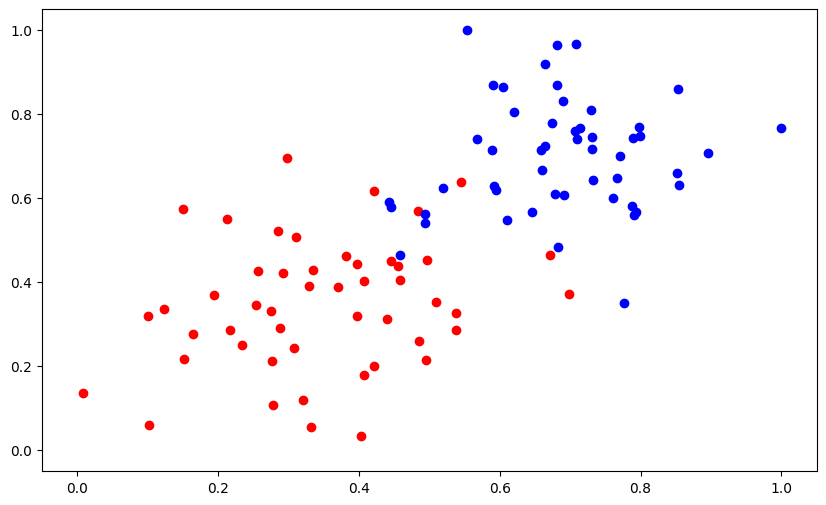

In [12]:
datas = pd.read_csv('https://raw.githubusercontent.com/sadoky/inteligencia-_articial_ELECT/main/data.csv')
X1=datas["X"]      # vector de entrada X1
X2=datas["W"]      # vector de entrada X2
Y1=datas["b"]      # bandera  o vector de salida


data = pd.read_csv('data.csv',header=None)
datos=data.drop([0],axis=0)
X =np.array(datos[[0,1]])
y=np.array(datos[2])



plot_points(Y1,X1,X2)

## Funciones basicas a implementar

Implemente las siguientes funciones.
- Funcion de activacion sigmoide

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Prediccion 

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Funcion error

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- Funcion para actualizar los pesos

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

# FUNCIONES

In [13]:
# Activation (sigmoid) function
def sigmoid(x):  
    sig = 1 / (1 + np.exp(-x))           # función sigmoide
    return sig



# Output (prediction) formula
def prediccion(features, weights, bias):
    
    lista_numeros_float = [float(num) for num in features]     # Vector necesario para realizar string2float

    mul=np.dot(lista_numeros_float,weights)                    #  WX
    output=sigmoid(mul+bias)                                   #  o(Wx+b)
   
    return output




# logaritmo natural 
def ln(x):
    return(np.log(x))



# Error (log-loss) formula
def error_formula(y, output):

    y_float = [float(num) for num in y]                         #string2float
   

    err=((1-y_float[0])*ln(1-sigmoid(output)))    +    (y_float[0]*ln(sigmoid(output)))
    err2=-err

    return(err2)




# Gradient descent step
def update_weights(x, y, weights, bias, learnrate,n_records,output):
    
    x2 = [float(num) for num in x]  
    sal=float(y[0])                                                        #string2float


    error = np.subtract(sal, output)                                       # calculo del error de la predicción

    cambio_pesos= [i * error for i in x2]
    cambio_bias=error


    cambio_pesos2=[j * learnrate for j in cambio_pesos]
    
    weights +=cambio_pesos2
    bias+=(cambio_bias*learnrate)                                          # ajuste de pesos y bias 
 
    return weights,bias





def prediccion_final(features, weights, bias,targets):
     

     salida=[]
     for x, y in zip(features, targets):                                             
            output = prediccion(x, weights, bias)
            salida.append(output)

    
     return(salida)




def error_formula_final(targets,out):
     
    sumatoria=0                                              # variable acumulativa  (necesaria para hallar el error en las 100 predicciones )

    for i in range (len(targets)):
          sum_error=error_formula(targets[i],out[i])      
          sumatoria+=sum_error                               # se acumula cada uno de los errores   
      
    return sumatoria 


     
     

## Funcion de entrenamiento
Esta funcion hace una interacion del algoritmo del gradiente descendente en todos los datos, para un numero determinado de epocas y algunas lineas limite a medida que avanza el algoritmo.

In [14]:
np.random.seed(44)



def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0                                                                  # pesos y bias definidos pre-entrenamiento 



    for e in range(epochs):
        


        for x, y in zip(features, targets):                                    # entrenamiento de la red 
            output = prediccion(x, weights, bias)
            weights, bias = update_weights(x, y, weights, bias, learnrate,n_records,output)
        



        # Printing out the log-loss error on the training set
        out = prediccion_final(features, weights, bias,targets)
        loss = np.mean(error_formula_final(targets, out))
        



        
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            #last_loss = loss
            #predictions = out > 0.5
            #accuracy = np.mean(predictions == targets)
            #print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
        
        
    
            


    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    #plot_points(features, targets)
    #plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Entrenamiento del algoritmo
Cuando corremos la funcion, se obtiene lo siguiente:
- 10 actualizaciones con perdidas del entrenamiento actual y precision.
- Un plot de los datos y las lineas de clasficacion que se obtienen. La final queda en negro. Entre mas epocas, las lineas se ajustan cada vez mejor =
- Un plot de la funcion error. Note que a medida que avanza las epocas, esta disminuye.


========== Epoch 0 ==========
Train loss:  73.95363495264509

========== Epoch 300 ==========
Train loss:  66.55143745146745

========== Epoch 600 ==========
Train loss:  63.472614014413516

========== Epoch 900 ==========
Train loss:  61.60688144107633

========== Epoch 1200 ==========
Train loss:  60.37607997902104

========== Epoch 1500 ==========
Train loss:  59.5059318061059

========== Epoch 1800 ==========
Train loss:  58.85773938081621

========== Epoch 2100 ==========
Train loss:  58.35534255411242

========== Epoch 2400 ==========
Train loss:  57.95378959308509

========== Epoch 2700 ==========
Train loss:  57.62492254376276


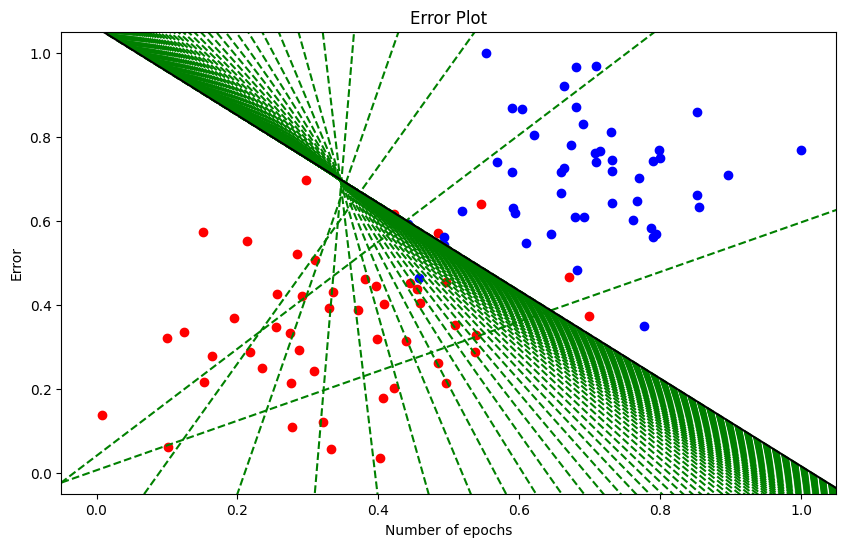

In [15]:
epochs = 3000
learnrate = 0.001

plot_points(Y1,X1,X2)
train(X, y, epochs, learnrate, True)